In [1]:
#Importing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_csv("spam_classification.csv",encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


#1)Data Cleaning

In [3]:
#Checking Missing Values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df = df.rename(columns={'v1':'Target','v2':'Text'})
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Encoding the Categorical Values Using LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Target']=en.fit_transform(df['Target'])
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
#df.isnull().sum()

In [8]:
#Checking Duplicates values
df.duplicated().sum()

403

In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [10]:
#df.duplicated().sum()
df.shape

(5169, 2)

#2)Exploratory Data Analysis

In [11]:
print(df.describe())

            Target
count  5169.000000
mean      0.126330
std       0.332253
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


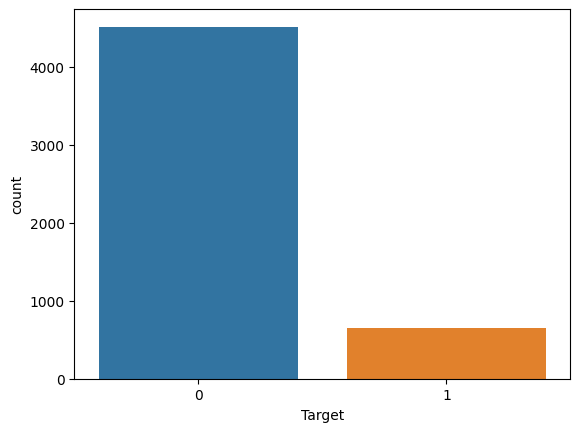

In [12]:
sns.countplot(x=df['Target'])
plt.show()

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
text_data = df['Text']

# Tokenize by characters
df['num_characters'] = text_data.apply(lambda x: len(x))
# Tokenize by sentences
df['num_sentences'] = text_data.apply(lambda x: len(sent_tokenize(x)))

# Tokenize by words
df['num_words'] = text_data.apply(lambda x: len(word_tokenize(x)))

# Display the updated DataFrame
#print(df[['Text', 'num_characters', 'num_sentences', 'num_words']])



<ipython-input-14-c51373f99de1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = text_data.apply(lambda x: len(x))
<ipython-input-14-c51373f99de1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = text_data.apply(lambda x: len(sent_tokenize(x)))
<ipython-input-14-c51373f99de1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [15]:
#df = pd.concat([df, df[['num_characters', 'num_sentences', 'num_words']]], axis=1)
df

,Target,Text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15
5570,0,The guy did some bitching but I acted like i'd...,125,1,27


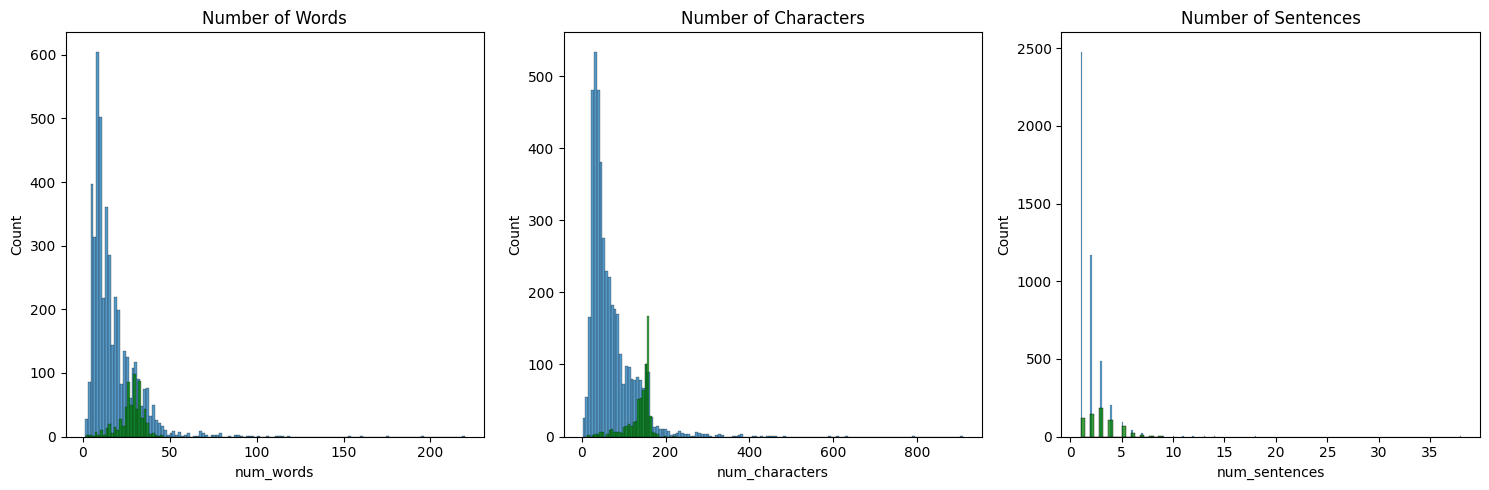

In [16]:
# Display histograms for tokenization features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='green')
plt.title('Number of Words')

plt.subplot(1, 3, 2)
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='green')
plt.title('Number of Characters')

plt.subplot(1, 3, 3)
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='green')
plt.title('Number of Sentences')

plt.tight_layout()
plt.show()

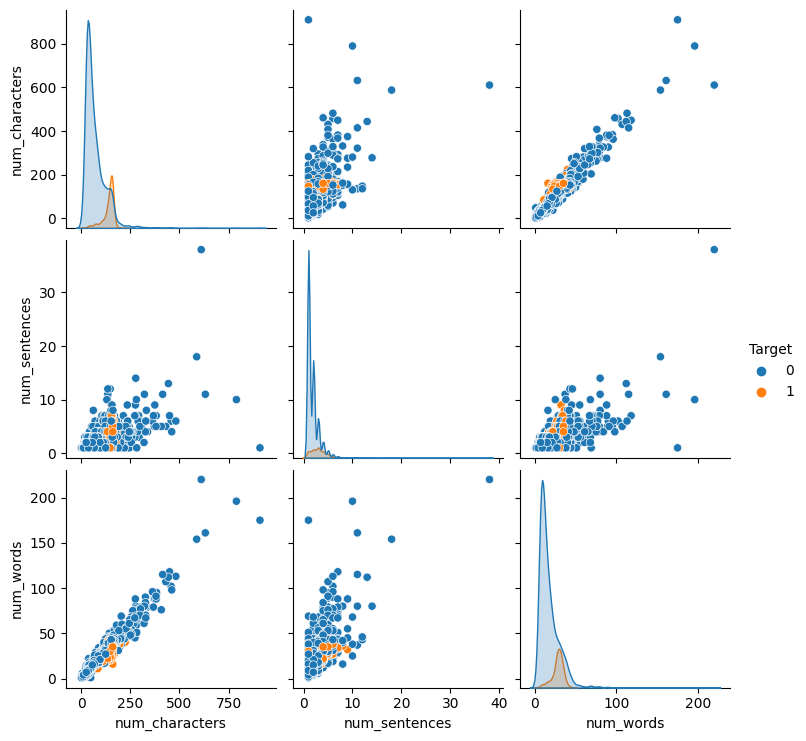

In [17]:
sns.pairplot(df,hue='Target')

<ipython-input-18-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

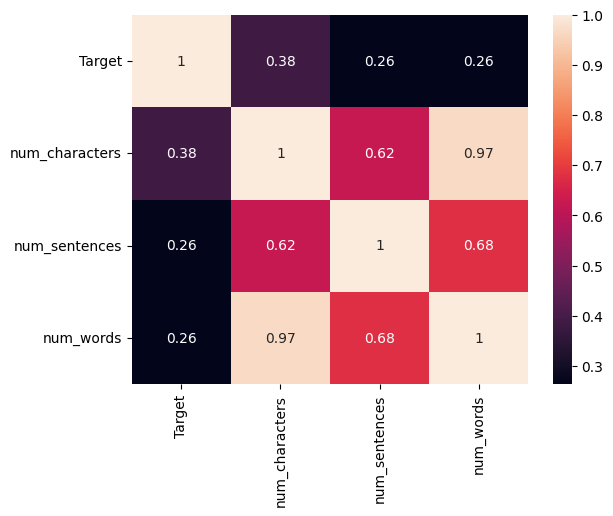

In [18]:
sns.heatmap(df.corr(),annot=True)

#3)Data Preprocessing

In [19]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Assuming 'Text' is the column containing your email text
text_data = df['Text']

# Download NLTK stopwords (if not already downloaded)
import nltk
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Function for text preprocessing with stopword and number removal
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the 'Text' column
df['processed_text'] = text_data.apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-19-fd3445b1c0fd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = text_data.apply(preprocess_text)


In [20]:
# Display the updated DataFrame
print(df[['Text', 'processed_text']])


                                                   Text  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                         processed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri wkli comp win fa cup final tkt st m...  
3                   u dun say earli hor u c alreadi say  
4

In [21]:
df.head()

,Target,Text,num_characters,num_sentences,num_words,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah dont think goe usf live around though


In [22]:
#from wordcloud import WordCloud
#wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [23]:
#spam_wc=wc.generate(df[df['Target']==1]['processed_text'].str.cat(sep=" "))

In [24]:
#plt.figure(figsize=(15,6))
#plt.imshow(spam_wc)

Checking Most Frequent Words Using WodCloud

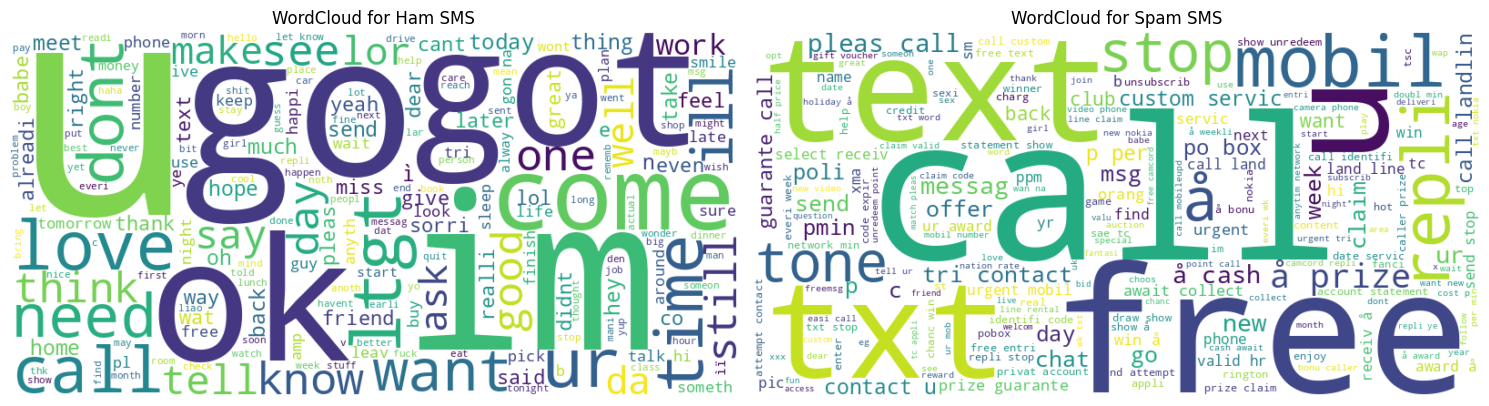

In [25]:
from wordcloud import WordCloud


# Assuming you have a column named 'processed_text' and 'label' in your DataFrame
ham_texts = df[df['Target'] == 0]['processed_text'].str.cat(sep=' ')
spam_texts = df[df['Target'] == 1]['processed_text'].str.cat(sep=' ')

# Generate WordCloud for 'ham' emails
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_texts)

# Generate WordCloud for 'spam' emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_texts)

# Display WordClouds for 'ham' and 'spam' using Matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Ham SMS')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam SMS')

plt.tight_layout()
plt.show()


In [26]:
spam_corpus=[]
for msg in df[df['Target']==1]['processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [27]:
len(spam_corpus)

9447

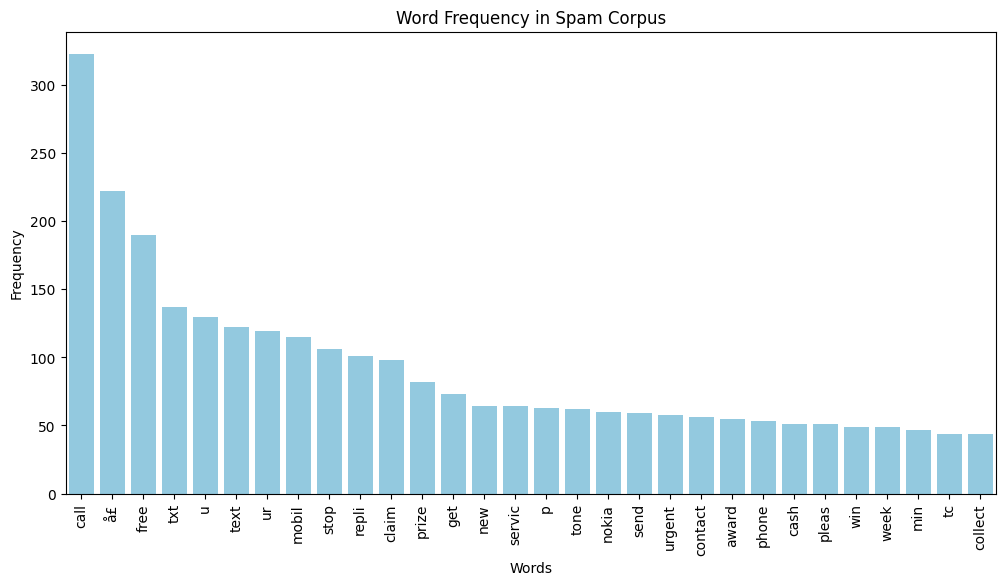

In [28]:
from collections import Counter

word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts_df, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Spam Corpus')
plt.xticks(rotation='vertical')
plt.show()

In [29]:
ham_corpus=[]
for msg in df[df['Target']==0]['processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

36264

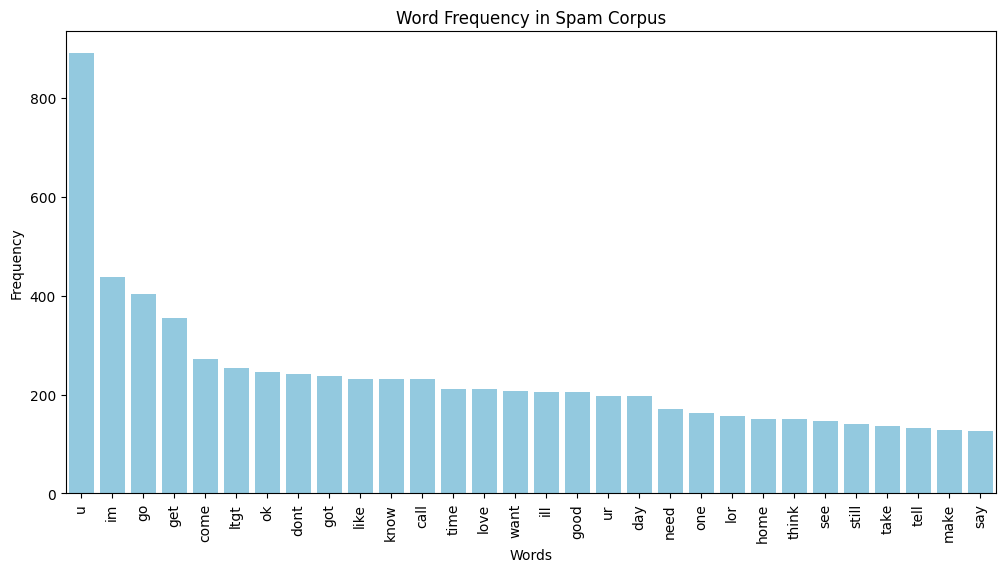

In [30]:
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts_df, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Spam Corpus')
plt.xticks(rotation='vertical')
plt.show()

In [31]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['processed_text']).toarray()

In [32]:
X.shape

(5169, 3000)

In [33]:
y=df["Target"].values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#4)Building Model

In [35]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB , BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [36]:
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [37]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [38]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8713733075435203
0.511520737327189
[[790 106]
 [ 27 111]]


In [39]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9806576402321083
0.9916666666666667
[[895   1]
 [ 19 119]]


Checking Other Machine Learning Algorithms Acuracy to Improve the Model Performance

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [41]:
from sklearn.metrics import accuracy_score,precision_score
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
lr_precision = precision_score(y_test,logreg_pred )

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")



Logistic Regression Accuracy: 0.9516441005802708
Logistic Regression Precision: 0.9680851063829787


In [42]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_pre=precision_score(y_test,nb_pred )
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Precision:{nb_pre}")



Naive Bayes Accuracy: 0.9709864603481625
Naive Bayes Precision:1.0


In [43]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_pre=precision_score(y_test,svm_pred )
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_pre}")




SVM Accuracy: 0.9700193423597679
SVM Precision: 0.9819819819819819


In [44]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_pre=precision_score(y_test,dt_pred )
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_pre}")



Decision Tree Accuracy: 0.9506769825918762
Decision Tree Precision: 0.8222222222222222


In [45]:
# k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_pre=precision_score(y_test,knn_pred)
print(f"kNN Accuracy: {knn_accuracy}")
print(f"kNN Precision: {knn_pre}")



kNN Accuracy: 0.9081237911025145
kNN Precision: 1.0


In [46]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_pre=precision_score(y_test,rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_pre}")



Random Forest Accuracy: 0.9709864603481625
Random Forest Precision: 0.9821428571428571


In [47]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_pre=precision_score(y_test,adaboost_pred)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")
print(f" AdaBoost Precision: {adaboost_pre}")



AdaBoost Accuracy: 0.9584139264990329
 AdaBoost Precision: 0.9439252336448598


In [48]:
# Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_pre=precision_score(y_test,bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")
print(f"Bagging Classifier Precision: {adaboost_pre}")



Bagging Classifier Accuracy: 0.9584139264990329
Bagging Classifier Precision: 0.9439252336448598


In [49]:
# Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)
extra_trees_pre=precision_score(y_test,extra_trees_pred )
print(f"Extra Trees Classifier Accuracy: {extra_trees_accuracy}")
print(f"Extra Trees Classifier Precision: {extra_trees_pre}")


Extra Trees Classifier Accuracy: 0.9748549323017408
Extra Trees Classifier Precision: 0.9590163934426229


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
gradient_pre=precision_score(y_test,gradient_boosting_pred)
print(f"Gradient Boosting Classifier Accuracy: {gradient_boosting_accuracy}")
print(f"Gradient Boosting Classifier Precision: {gradient_pre}")

# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_pre=precision_score(y_test,xgb_pred)
print(f"XGBoost Classifier Accuracy: {xgb_accuracy}")
print(f"XGBoost Classifier Precision: {xgb_pre}")

Gradient Boosting Classifier Accuracy: 0.9545454545454546
Gradient Boosting Classifier Precision: 0.9333333333333333
XGBoost Classifier Accuracy: 0.9738878143133463
XGBoost Classifier Precision: 0.9512195121951219


In [51]:
#voting classifier
svm=SVC(probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svm),('nb',mnb),('et',etc)],voting='soft')


In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier(n_estimators=50))],
                 voting='soft')

In [ ]:
#Based on Voting Classifier Result Extratree Classifier Algorithm giving more Accuracy.

In [ ]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
#Saving this Model Using Pickle library
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))